# Name : Parth Bhalani
# Student ID : 23005402

In [88]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import scipy.stats as ss
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [33]:
# Load our top Mall_Customers data using pandas and store in df
df = pd.read_csv("Data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info() # Basic Information of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### we have 200 rows and 5 columns and there is no missing value

In [35]:
df.describe() # description of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.dtypes # check the data type

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
df.isnull().sum() #check the missing value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Now we see some statistics

In [39]:
# # Display all major moments
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [40]:
## 
def analyze_data(df):
    """
    Analyze the provided DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.

    Returns:
        None
    """
    # Display all major moments
    print("Mean:")
    print(df.mean())
    print("\nMedian:")
    print(df.median())
    print("\nMode:")
    print(df.mode().iloc[0]) 

    # Calculate skewness and kurtosis
    skewness = df.skew()
    kurtosis = df.kurtosis()

    print("\nSkewness:")
    print(skewness)

    print("\nKurtosis:")
    print(kurtosis)

    # Calculate correlation matrix
    correlation_matrix = df.corr()

    print("\nCorrelation Matrix:")
    print(correlation_matrix)

In [30]:
analyze_data(df)

Mean:
CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

Median:
CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

Mode:
CustomerID                     1
Gender                    Female
Age                         32.0
Annual Income (k$)          54.0
Spending Score (1-100)      42.0
Name: 0, dtype: object

Skewness:
CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Kurtosis:
CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age        

# visualization

In [41]:
plt.style.use('fivethirtyeight') # style the plot

In [42]:
# histogram function
def plot_hist(df, feature):
    """
    Create the histogram(Distplot) of age, Annual Income and Spending Score
    
    """
    sns.set(font_scale=1.2)  # Increase font size
    sns.distplot(df[feature], bins=20)
    plt.title('Distplot of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Density')

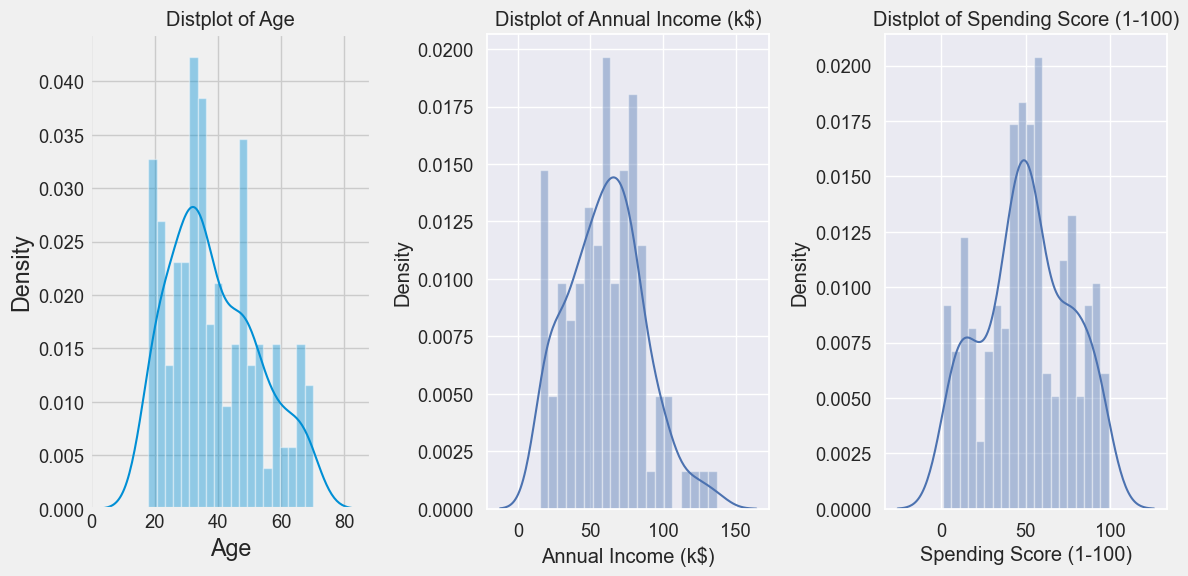

In [43]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'], start=1):
    plt.subplot(1, 3, i)
    plot_hist(df, feature) # call the function 
    
plt.tight_layout()
plt.show() # display the graph 

## Age group near 30-40 have the highest density.
## Most customers have income in range of 50-80k.
## Most of the customers have spending score of 50.

### 2. Scatter Plot

In [44]:
def plot_scatter_by_gender(df):
    """
    Create the scatter Graph Age vs Annual Income (Gender)
    
    """
    plt.figure(figsize=(15, 6))
    for gender in ['Male', 'Female']:
        plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                    s=200, alpha=0.5, label=gender)

    plt.xlabel('Age', fontsize= 25)
    plt.ylabel('Annual Income (k$)',fontsize=25)
    plt.title('Age vs Annual Income (Gender)', fontsize=25)
    plt.legend(fontsize=25)
    plt.show()

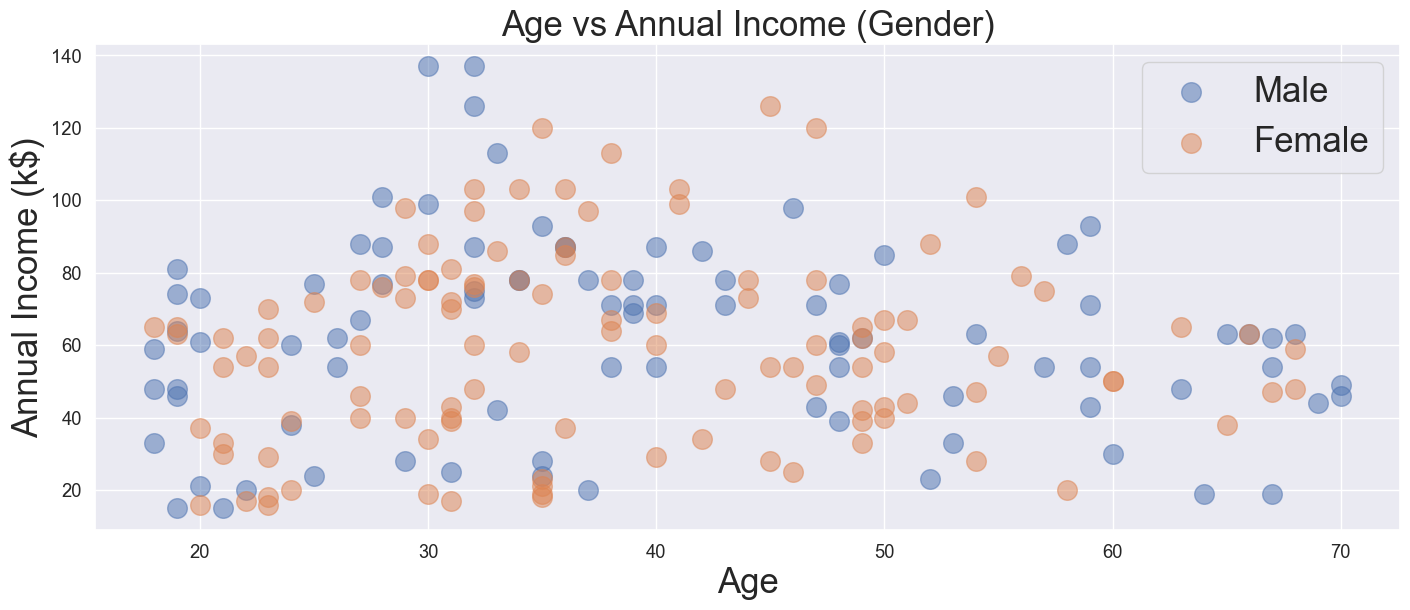

In [45]:
plot_scatter_by_gender(df)

### Highest annual income is Male 
### 30-40 age has highest salary

## 3. Box and SwarmPlot

In [14]:
def plot_box_swarm(df):
    """
    Create the box_swarm Graph of age, Annual Income and Spending Score
    
    """
    plt.figure(1, figsize=(15, 7))
    n = 0 
    for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1 
        plt.subplot(1, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
        sns.swarmplot(x=cols, y='Gender', data=df)
        plt.ylabel('Gender' if n == 1 else '',fontsize= 25)
        plt.title('Boxplots & Swarmplots' if n == 2 else '',fontsize= 25)
        plt.xlabel(cols, fontsize=20)
    plt.show()

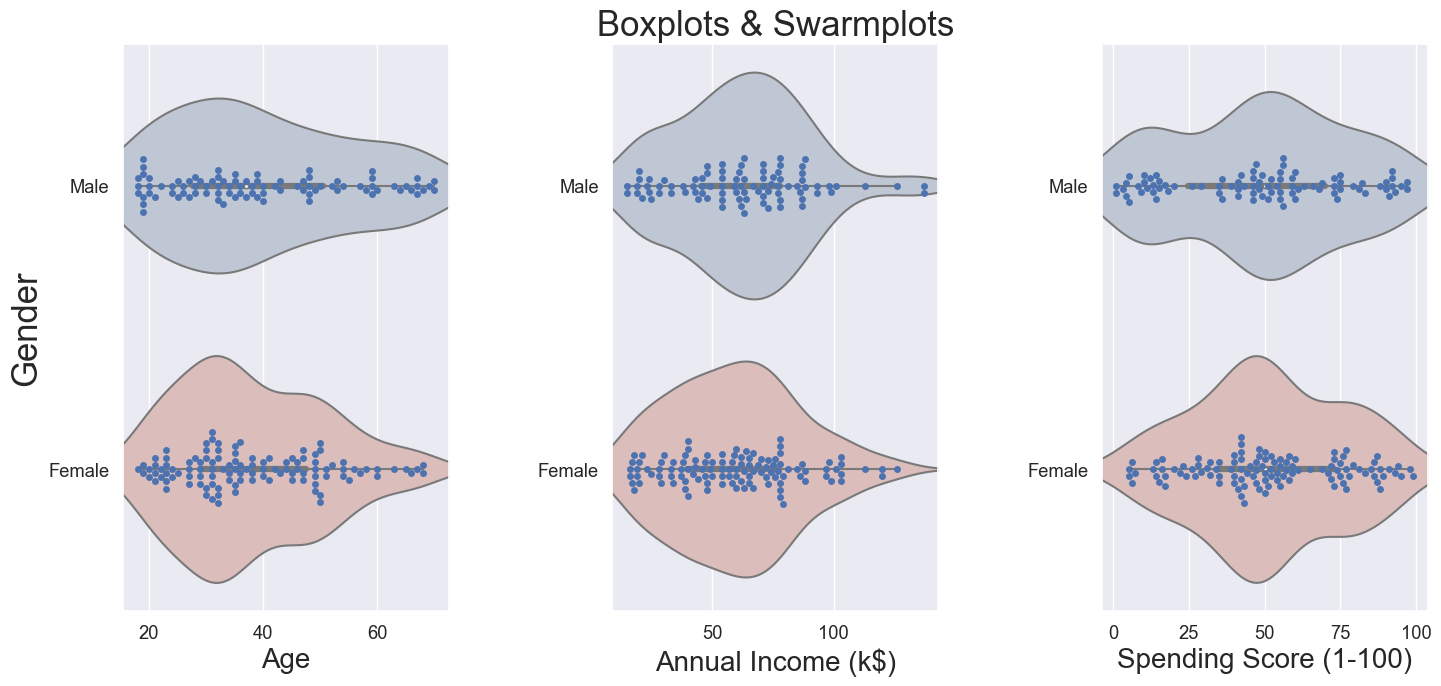

In [15]:
plot_box_swarm(df)

## 4. Count Plot

In [55]:
def plot_gender_count(df):
    """
    Create the count Graph of Male and Female
    
    """
    plt.figure(1, figsize=(15, 5))
    sns.countplot(y='Gender', data=df)
    plt.xlabel('Count', fontsize=25)  # Increase x-axis label font size
    plt.ylabel('Gender', fontsize=25)  # Increase y-axis label font size
    plt.title('Count of Gender', fontsize=25)  # Increase title font size
    plt.show()

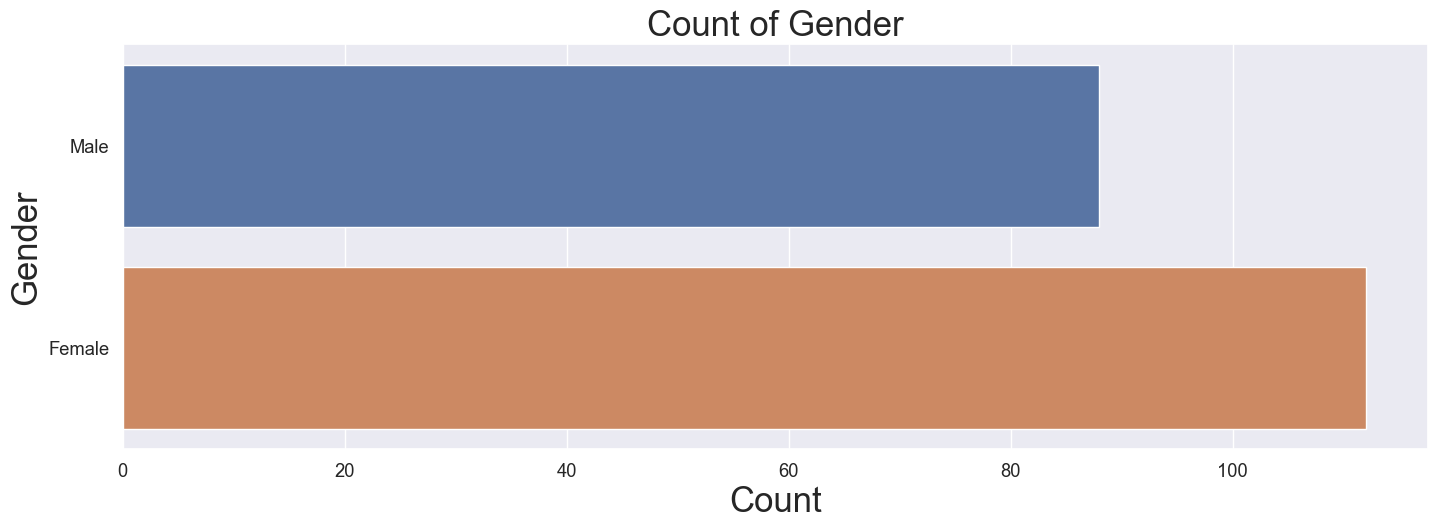

In [56]:
plot_gender_count(df)

### We have most numbers of female data than man

# Clustering

In [57]:
def calculate_inertia(df):
    """
    Calculate inertia for KMeans clustering.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.

    Returns:
        list: List of inertia values for different number of clusters.
        
    """
    global X1
    X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
    inertia = []
    for n in range(1, 11):
        algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                           tol=0.0001, random_state=111, algorithm='elkan')
        algorithm.fit(X1)
        inertia.append(algorithm.inertia_)
    
    return inertia

In [86]:
inertia_values = calculate_inertia(df)
print(inertia_values)
warnings.filterwarnings('ignore', category=FutureWarning)

[570460.5201997419, 259931.06509444732, 170969.2049323078, 135145.37880169405, 113495.53272574236, 96655.79265740533, 83799.98607867534, 73247.41393158506, 65374.1595828945, 59540.6816482675]


# Elbow Method

In [59]:
def plot_inertia(inertia):
    """
    Plot inertia values for different numbers of clusters.

    Parameters:
        inertia (list): List of inertia values for different number of clusters.

    Returns:
        None
    """
    plt.figure(1, figsize=(10, 6))
    plt.plot(np.arange(1, 11), inertia, 'o')
    plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
    plt.xlabel('Number of Clusters',fontsize=20)
    plt.ylabel('Inertia',fontsize=20)
    plt.show()

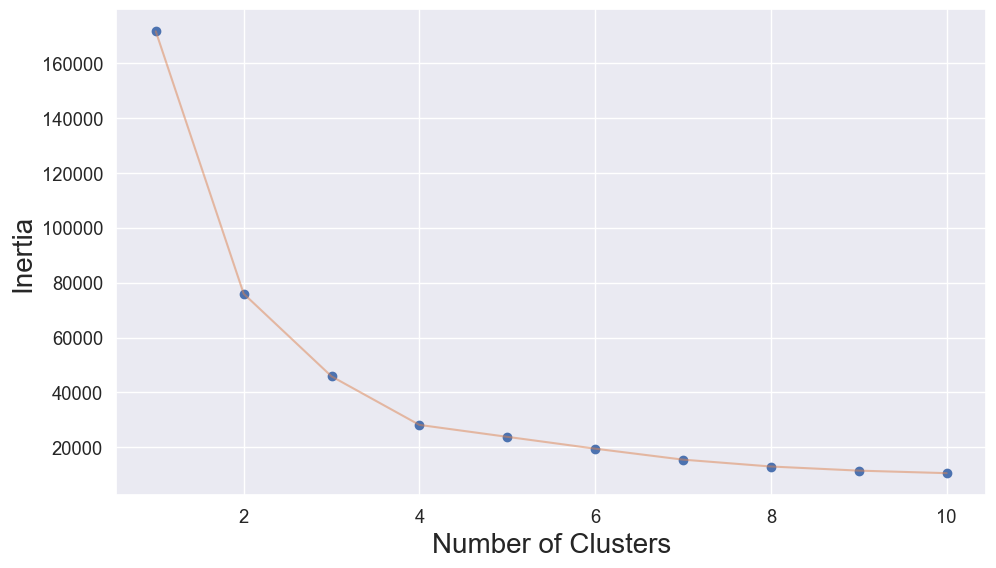

In [60]:
plot_inertia(inertia_values)

# Number of cluster is 4  

In [61]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [62]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [63]:
def plot_clusters_on_grid(xx, yy, Z, df, labels, centroids):
    """
    Plot clusters on a grid.

    Parameters:
        xx (array): The x-coordinates of the grid.
        yy (array): The y-coordinates of the grid.
        Z (array): The predicted labels for each point on the grid.
        df (DataFrame): The input DataFrame containing the data.
        labels (array): The predicted labels for each data point.
        centroids (array): The centroids of the clusters.

    Returns:
        None
    """
    plt.figure(1, figsize=(15, 7))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
    plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels, s=200)
    plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red', alpha=0.5)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.xlabel('Age',fontsize=20)
    plt.show()

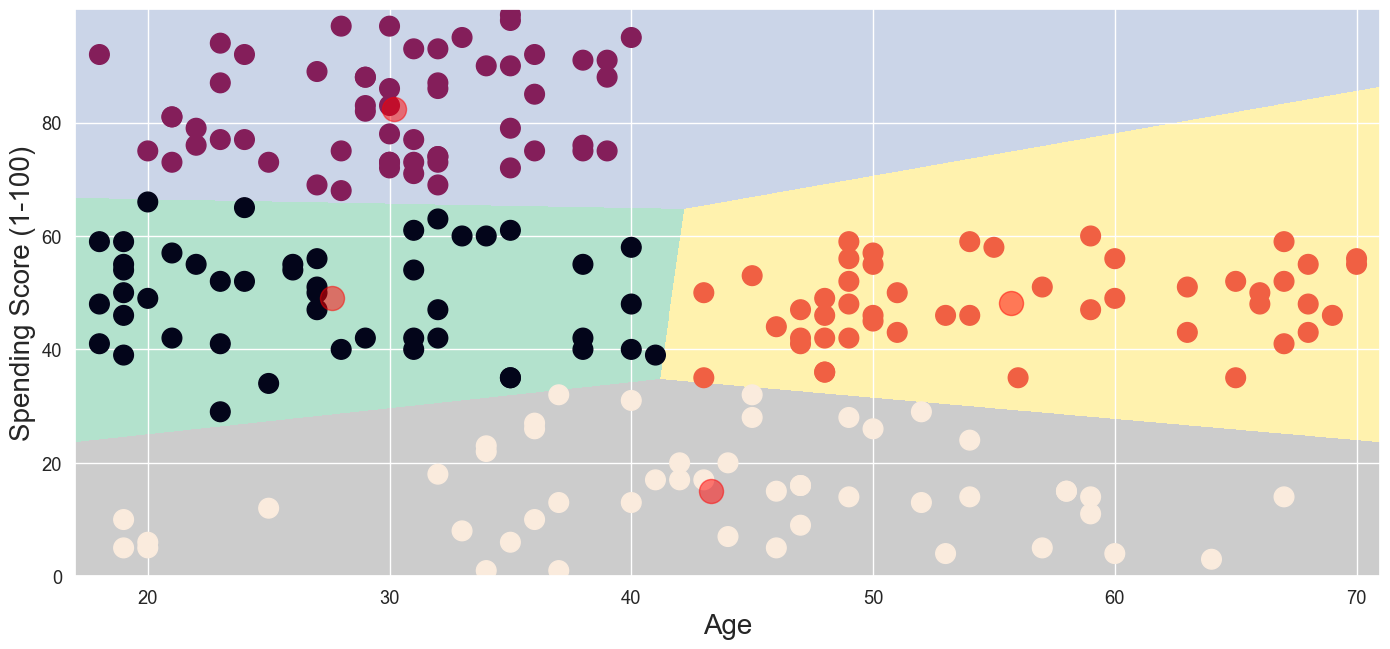

In [64]:
plot_clusters_on_grid(xx, yy, Z, df, labels1, centroids1)

In [70]:
def calculate_inertia(X):
    """
    Calculate inertia for KMeans clustering.

    Parameters:
        X (array-like): The input data for clustering.

    Returns:
        list: List of inertia values for different number of clusters.
    """
    inertia = []
    for n in range(1, 11):
        algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                           tol=0.0001, random_state=111, algorithm='elkan')
        algorithm.fit(X)
        inertia.append(algorithm.inertia_)
    
    return inertia

In [71]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia_values2 = calculate_inertia(X2)
print(inertia_values2)

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37265.86520484347, 30241.343617936593, 25022.48500453035, 21841.97825674864, 19707.25897979477]


In [76]:
def plot_inertia(inertia):
    """
    Plot inertia values for different numbers of clusters.

    Parameters:
        inertia (list): List of inertia values for different number of clusters.

    Returns:
        None
    """
    plt.figure(1, figsize=(12, 6))
    plt.plot(np.arange(1, 11), inertia, 'o')
    plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
    plt.xlabel('Number of Clusters',fontsize=20)
    plt.ylabel('Inertia',fontsize=20)
    plt.show()

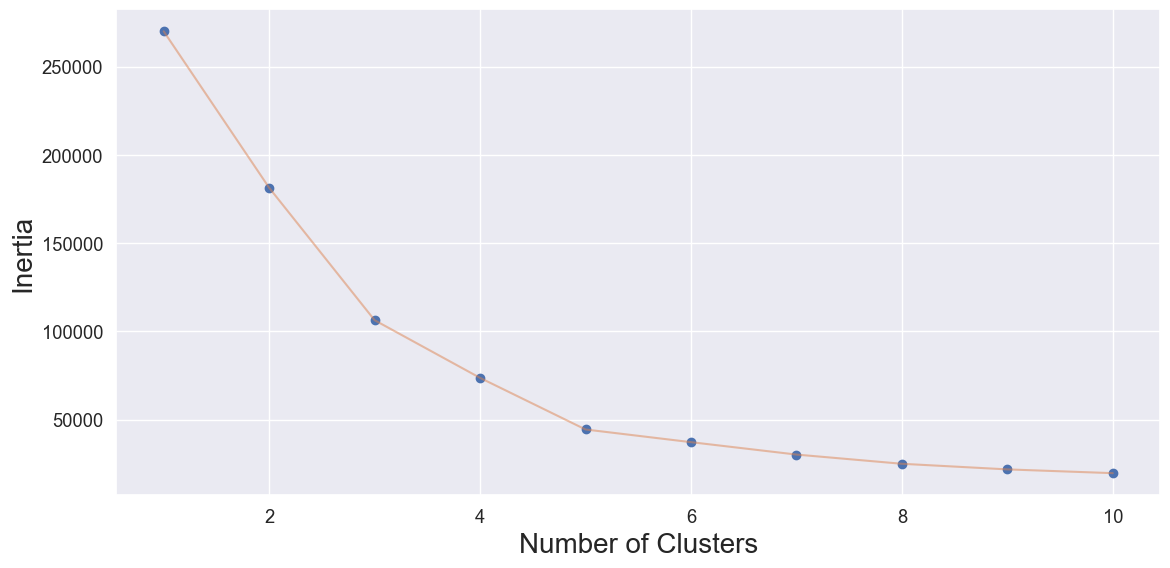

In [78]:
plot_inertia(inertia_values2)

### Number of Cluster is 5

In [79]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [80]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [81]:
def plot_clusters_on_grid(xx, yy, Z, df, labels, centroids):
    """
    Plot clusters on a grid.

    Parameters:
        xx (array): The x-coordinates of the grid.
        yy (array): The y-coordinates of the grid.
        Z (array): The predicted labels for each point on the grid.
        df (DataFrame): The input DataFrame containing the data.
        labels (array): The predicted labels for each data point.
        centroids (array): The centroids of the clusters.

    Returns:
        None
    """
    plt.figure(1, figsize=(15, 7))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels, s=200)
    plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red', alpha=0.5)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.xlabel('Annual Income (k$)',fontsize=20)
    plt.show()

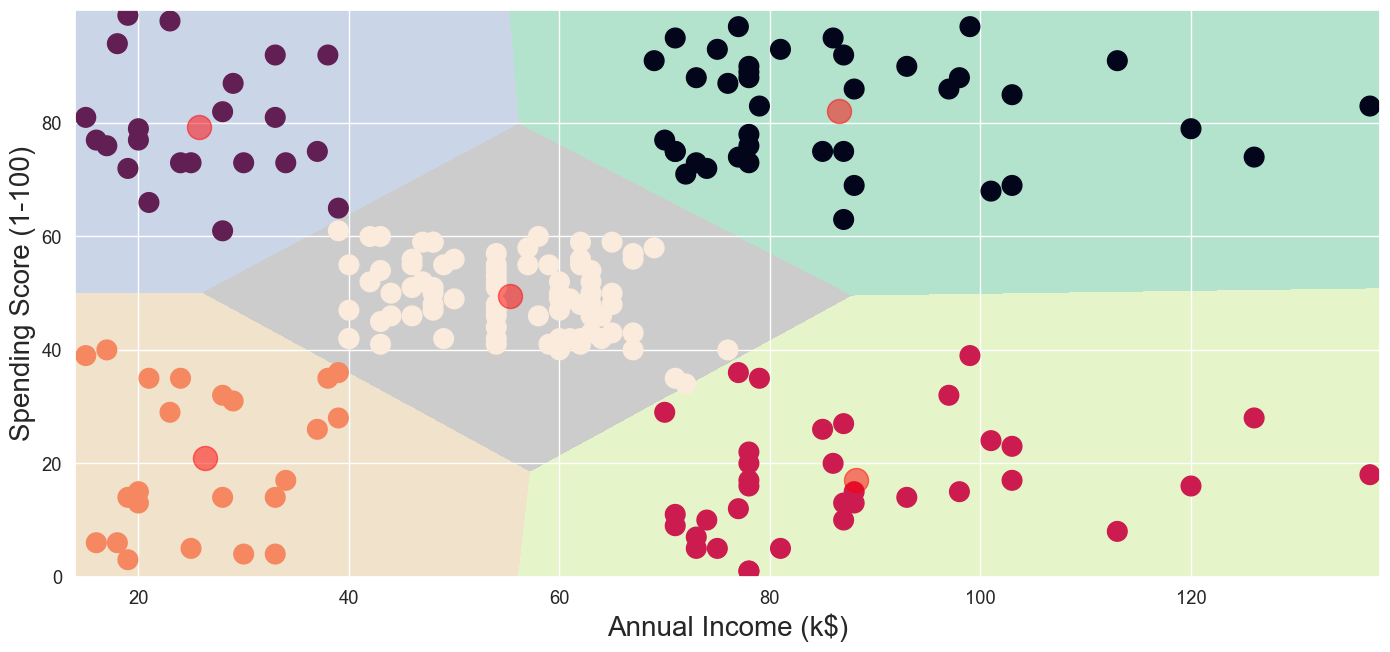

In [82]:
plot_clusters_on_grid(xx, yy, Z2, df, labels2, centroids2)

## Fitting Line

In [83]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
income = np.random.normal(loc=50, scale=20, size=n_samples)
spending_score = income * 0.5 + np.random.normal(loc=0, scale=10, size=n_samples)

df = pd.DataFrame({'Annual Income (k$)': income, 'Spending Score (1-100)': spending_score})

In [84]:

# Plot with confidence interval and error bars
def plot_with_confidence_interval(df):
    """
    Create a plot with confidence interval and error bars.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, ci=95)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Spending Score vs Annual Income')
    plt.show()

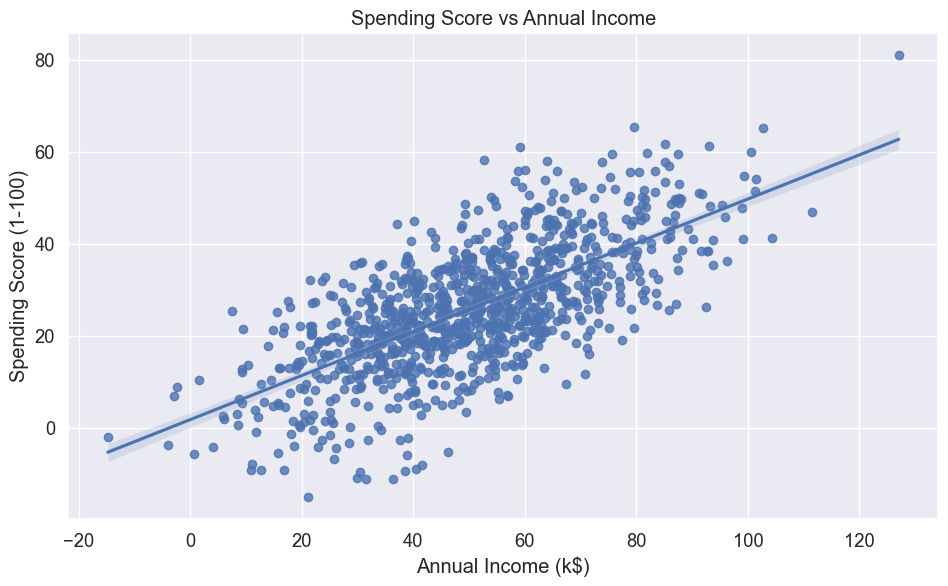

In [85]:
plot_with_confidence_interval(df)